In [60]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

df_loaded = pd.read_csv('insurance_data_cleaned.csv')

In [61]:

X_loaded = df_loaded.drop('charges_scaled', axis=1)

y_loaded = df_loaded['charges_scaled'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X_loaded, 
    y_loaded, 
    test_size=0.20, 
    random_state=42 
)

#  Load the Scaler

scaler_y = joblib.load('scaler_y.pkl') 



In [62]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [63]:
def knn(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_values = [label for _, label in distances[:k]]
    return np.mean(k_nearest_values)

In [70]:
best_r2 = -np.inf
best_k = None
best_y_pred = None

for k_try in range(1, 5):
    y_pred_try = np.array([
        knn(X_train.values, y_train.flatten(), X_test.values[i], k_try)
        for i in range(len(X_test))
    ])
    r2_try = r2_score(y_test, y_pred_try)
    if r2_try > best_r2:
        best_r2 = r2_try
        best_k = k_try
        best_y_pred = y_pred_try

print(f"Best k = {best_k}, Best R² = {best_r2:.4f}")

Best k = 4, Best R² = 0.7582


In [ ]:
y_pred = np.array([knn(X_train.values, y_train.flatten(), X_test.values[i], best_k) 
                    for i in range(len(X_test))])


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"KNN Results (k={best_k}):")
print(f"MAE = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")


KNN Results (k=4):
MAE = 0.3298
RMSE = 0.5072


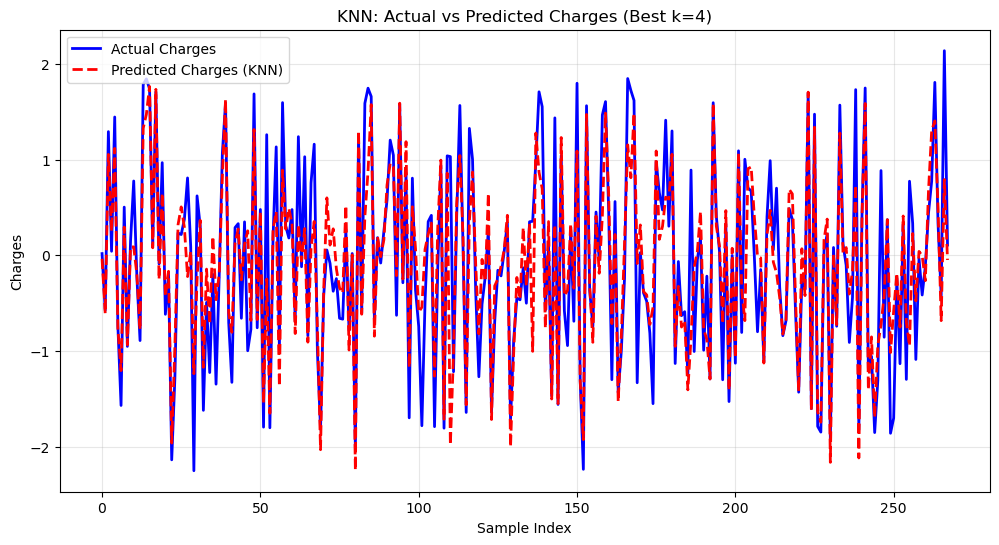

In [67]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Charges', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Charges (KNN)', color='red', linewidth=2, linestyle='--')
plt.title(f'KNN: Actual vs Predicted Charges (Best k={best_k})')
plt.xlabel('Sample Index')
plt.ylabel('Charges')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [66]:
r2 = r2_score(y_test, y_pred)
print(f"R² score = {r2:.4f}")


R² score = 0.7582
